In [18]:
import pandas as pd
from reliability.Fitters import Fit_Everything
from reliability.Distributions import DSZI_Model, Gamma_Distribution
from reliability.Fitters import Fit_Gamma_3P, Fit_Weibull_DS
import matplotlib.pyplot as plt
from reliability.Probability_plotting import plot_points

In [6]:
failures = [0.10527777777777778,
 2.0797222222222222,
 2.091388888888889,
 1.0316666666666667,
 0.6155555555555555,
 0.22444444444444445,
 1.2216666666666667,
 0.1438888888888889,
 1.273611111111111,
 2.1058333333333334,
 0.07305555555555555,
 0.6675,
 0.4436111111111111,
 0.79,
 1.5591666666666666,
 0.235,
 0.26916666666666667,
 0.09555555555555556,
 0.5063888888888889,
 2.278611111111111,
 0.10416666666666667,
 2.4433333333333334,
 0.21555555555555556,
 0.12194444444444444,
 0.35388888888888886,
 0.6738888888888889,
 0.7930555555555555,
 0.10277777777777777,
 0.7061111111111111,
 0.13555555555555557,
 0.4538888888888889,
 0.1963888888888889,
 0.465,
 0.41333333333333333,
 1.0483333333333333,
 1.9275,
 1.8227777777777778,
 0.5791666666666667,
 0.059444444444444446,
 0.21861111111111112,
 0.6972222222222222,
 0.12833333333333333,
 0.11972222222222222,
 1.1675,
 0.3322222222222222,
 0.058611111111111114]

In [7]:
len(failures)

46

In [12]:
right_censored_list = []
for value in range(0,3219,1):
    right_censored_list.append(2.5)

In [13]:
len(right_censored_list)

3219

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 46/3219 (98.59112% right censored) 

   Distribution    Alpha     Beta     Gamma  Alpha 1   Beta 1 Alpha 2  Beta 2 Proportion 1      DS      Mu   Sigma     Lambda  Log-likelihood    AICc     BIC      AD optimizer
   Lognormal_3P                   0.0585111                                                        14.7483 6.31421                   -262.408 530.824  549.09 1189.75       TNC
 Loglogistic_3P    30879  0.44969 0.0585111                                                                                          -262.803 531.614 549.879 1189.75       TNC
     Weibull_3P  32563.4 0.447963 0.0585111                                                                                           -262.82 531.648 549.914 1189.75       TNC
       Gamma_3P    45083 0.446243 0.0585111                                                                                          -262.838 531.683 549.949 1189.75       TNC
   Log

IndexError: index 0 is out of bounds for axis 0 with size 0

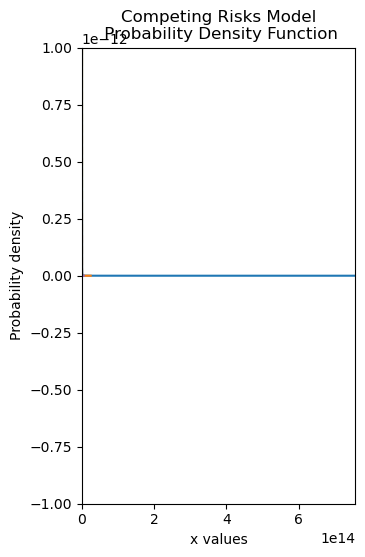

In [14]:
reliability_results = Fit_Everything(failures=failures, 
right_censored=right_censored_list,
 show_histogram_plot=True, show_probability_plot=True, show_PP_plot=True, show_best_distribution_probability_plot=True)

In [15]:

model = DSZI_Model(distribution=Gamma_Distribution(alpha=5,beta=2), DS=0.014290152221186705,ZI=0)

Results from Fit_Gamma_3P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 46/3219 (98.59112% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha           45083         66893.7   2460.41    826071
     Beta        0.446243       0.0658279    0.3342   0.59585
    Gamma       0.0585111     0.000132949 0.0582511 0.0587723 

Goodness of fit    Value
 Log-likelihood -262.838
           AICc  531.683
            BIC  549.949
             AD  1189.75 



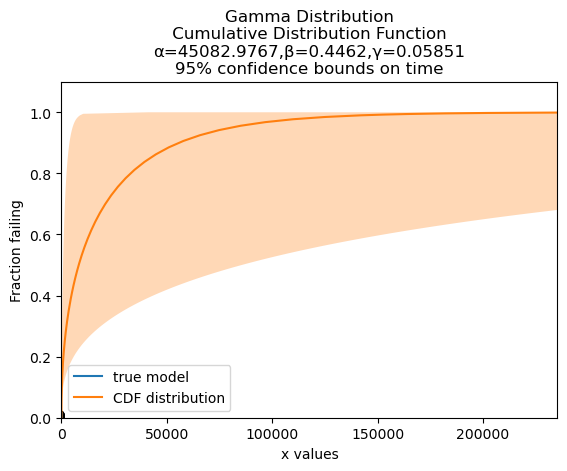

In [17]:
model.CDF(label="true model")
fit_DS = Fit_Gamma_3P(failures=failures, right_censored=right_censored_list, show_probability_plot=False)
fit_DS.distribution.CDF(label="CDF distribution")
#fit_DS.distribution.SF(label="fitted Fit_Weibull_3P")
plot_points(failures=failures, right_censored=right_censored_list)
plt.legend()
plt.show()

Results from Fit_Weibull_DS (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 46/3219 (98.59112% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha        0.911845        0.252568  0.529846   1.56925
     Beta        0.916854        0.137835  0.682866   1.23102
       DS         0.01532       0.0025091 0.0111055 0.0210999 

Goodness of fit    Value
 Log-likelihood -270.585
           AICc  547.177
            BIC  565.443
             AD  1189.75 



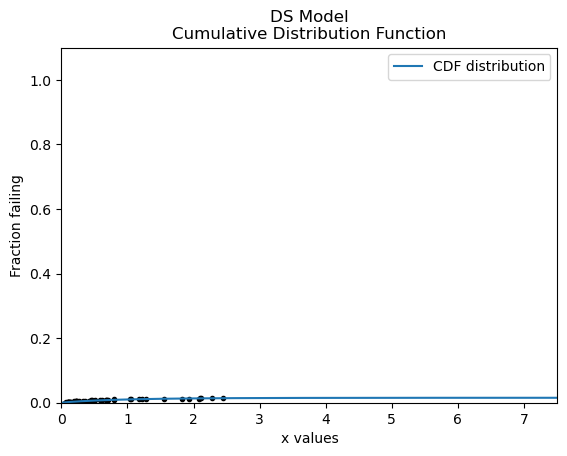

In [22]:
#model.CDF(label="true model")
fit_DS = Fit_Weibull_DS(failures=failures, right_censored=right_censored_list, show_probability_plot=False)
fit_DS.distribution.CDF(label="CDF distribution")
#fit_DS.distribution.SF(label="fitted Fit_Weibull_DS")
plot_points(failures=failures, right_censored=right_censored_list)
plt.legend()
plt.show()